***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography._
<br>
**Code is hosted [here](https://github.com/mrborin/ucl-CASA0006-Data-Science-for-Spatial-Systems.git)**<br>
***

# Explore how Airbnb influenced the London housing market (house prices and rentals): 
<p style="color:DimGray; text-align:left; font-size:20px"><i> the case of London </i></p>
<a id="ID_title"></a>

<p style="color:DimGray; text-align:left;"><i>This paper explores how Airbnb is influencing the London housing market at two different geographic levels- Borough and LOSA.<br>The main influencing factors explored include the number of Airbnb's, prices, Misuse's situation</i></p>

***

## 1.0 | Introduction
This paper outlines the research process, methodology, and results of a study exploring how Airbnb affects the London housing market, including housing prices and rents. In an attempt to understand more about the socio-economic impact of internet sharing platforms such as Airbnb. Attempt to build predictive models and try to provide policy makers with insights on relevant policy adaptation and enforcement updates.

The data includes geographic data on London, housing market data and Airbnb listings data, all from publicly available databases.

Through the analysis, the evidence shows that Airbnb listings will drive the growth of London house prices and aggravate the pressure of Londoners, especially new immigrants, to buy houses; secondly, after the government legislation on Airbnb misuse in 2015, the policy enforcement is not in place, and there are still more misuse situations, which further positively affects London house prices.

Information about the methodology, data processing procedures and results will be explained in the paper. Appropriate additions are made in the comments accompanying the code.


### 1.1 | Environment configuration before analysis
An overview of packages used to run the analysis with brief explanation of their role.

In [1]:
# Packages for data manipulation and processing
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd

# Packages for visualisation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches

#  Packages for analysis
import scipy as sp
import scipy.stats as sps
import seaborn as sn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## 2.0 | Literature review & Research question

### Airbnb and London housing market background

In London, airbnb entered the market in 2008 and began its explosive growth in 2014.
(Rowland Manthorpe, 2018). Due to its convenience and real-time nature, more customers are 
choosing to use airbnb, which has attracted more accommodation providers to join, as well as 
specialist providers with a large number of listings. One of the biggest problems with this type of service so far 
One of the biggest problems with such services to date is the lack of collective regulation (Stone, 2017).

London is a city with a large and unequal foreign population and rapidly increasing rents.
House prices are very high, incomes are unequally distributed, and social classes are highly polarized.
Those who owned property earlier benefited from the rapid rise in house prices, while a large 
large number of new Londoners, those with lower incomes, have no choice but to rent due to high house prices.
This has also raised demand in the rental market and affected rents (Davidson & Wyly, 2012; Hamnett, 2003; Zervas, 2017). the impact of the rapid growth of airbnb on the housing market has attracted more attention. Some scholars' studies have found that the rapid rise of airbnb may have potential impacts on the housing market,and they argue that Airbnb is invading 
housing market and hotels (Barron, Kung & Proserpio, 2018; Gutiérrez et al., 2017a, 2017b; Horn & Merante, 2017; Sheppard & Udell, 2016). However, at the same time some researchers did not find a significant negative impact of Airbnb in reducing permanent housing and converting it into short-term accommodation (Snelling & Colebrook, 2016). As Airbnb varies greatly across regions and is highly dependent on socioeconomic and geographic factors such as the housing market in the city itself and the number of popular attractions within an area (Quattrone et al., 2016), the impact of Airbnb is very much in need of analysis on a regional scale. Therefore the research in this thesis will be conducted separately at Borough and MSOA in an attempt to draw comparisons, but the regression analysis will be conducted at MSOA level due to the greater abundance of data at MSOA level.

The UK government introduced regulations in 2015 to limit the use of vacation homes to no more than 90 days per year, with the government arguing that the misuse situation would exacerbate the tightness of the local housing market (HM Government United Kingdom, 2015).
This therefore leads to the first research question:

    RQ1 | What is the current Misuse situation for listings on London Airbnb and how is Misuse affecting the London housing market?

According to Section 44 of the Deregulation Act implemented in London, we used the following criteria to define potential misuse.
<br>a. Overall occupancy in London 2020 is approximately 50% (InsideAirbnb, 2018). Cumulatively, there are more than 180 days of entire listings available in a year. These listings are likely to be booked for more than 90 days per year (which violates the 90-day limit for renting properties as vacation homes in London).
<br>b. Airbnb abuse is when a host has multiple (two or more) listings in a year where the entire listing is available for more than 180 days cumulatively in a year.

Airbnb's impact on local housing may also be determined by the price of its listings, and the number of listings (Barron, Kung & Proserpio, 2018; Gutiérrez et al., 2017a, 2017b; Horn & Merante, 2017; Rev. & 2016, n.d.; Sheppard & Udell, 2016).
Therefore, in order to explore more fully and deeply the impact of Airbnb on local housing markets, we need a new research question:

    RQ2 | How does the number of London Airbnb listings, prices, and Misuse situation affect the London housing market?

This study aims to explore the impact of Airbnb on the local housing market: house prices and rents, exploring the number, price, availability and potential abuse of Airbnb rates in London. It provides insight into the adaptation of policies and regulations and updates on enforcement. The median house price may be more able (Snelling & Colebrook, 2016)

## 3.0 | Data preparation and presentation 

### 3.1 The sources of datasets

Geographic data and London housing market data from the Office for National Statistics (ONS), housing market data including house price data for 2014 to 2021: Median house prices by middle layer super output Airbnb data is sourced from a third party data collector: Inside Airbnb. Listings are properties advertised on the Airbnb platform (including entire properties, private rooms, or shared rooms).
The response variable in the regression and prediction analysis is only London house prices at the MSOA level, as the rent data is mainly at the Borough level, where the data is relatively small and the results of the regression analysis may not be sufficiently prepared. Since the gap between high-value and low-value properties is too large, median house prices are somewhat more representative of the real city's house price situation than the average (Davidson & Wyly, 2012; Hamnett, 2003; Zervas, 2017), median house prices are chosen as the response variable.

### 3.2 Geographic data preparation (prevalidation, cleaning and pre-processing)
Due to the subsequent geographic visualization needs, we need to prepare the administrative division map of London at MSOA and Borough level, "join" the administrative division lines to the London map by gpd.sjoin() function, and then organize the format and remove the useless columns to get the required geographic data set.

In [2]:
#LOAD MSOAS
msoas = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
#Grab the Borough Boundaries
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})
boros

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


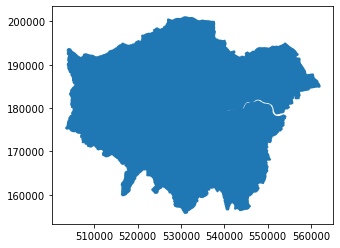

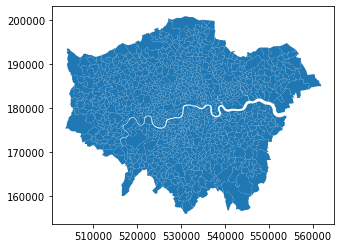

In [3]:
# get all MSOAs _within_ London 
# buffer the boundary by 250m.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();
ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();
del(msoas)

#Extract Borough Names
ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)
# - 33 boroughs

Since the original dataset does not have the MSOA name, the MSOA-level domain name is added to the dataset here via the pd.merge() function and the useless columns 'MSOA11NMW', 'LONG', 'LAT', 'Shape__Are', 'Shape__Len', 'index_right', 'original ','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw' removed.

In [4]:
#Add MSOA Names
msoa_nms = pd.read_csv('https://github.com/jreades/i2p/blob/master/data/src/MSOA-Names-1.8.csv.gz?raw=true', compression='gzip')
print(msoa_nms.columns.values)
msoa_nms.sample(3, random_state=42)
msoas = pd.merge(ldn_msoas, msoa_nms, left_on='MSOA11CD', right_on='msoa11cd', how='inner')
print(msoas.shape)
print(type(msoas)) #  check this to make sure it's GeoDataFrame
msoas.sample(3, random_state=42)[['OBJECTID','MSOA11CD','MSOA11NM','msoa11hclnm']]

['msoa11cd' 'msoa11nm' 'msoa11nmw' 'msoa11hclnm' 'msoa11hclnmw' 'Laname']
(983, 20)
<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,MSOA11CD,MSOA11NM,msoa11hclnm
810,811,E02000841,Sutton 002,St Helier South
801,802,E02000832,Southwark 026,Nunhead North
813,814,E02000844,Sutton 005,The Wrythe


<AxesSubplot:>

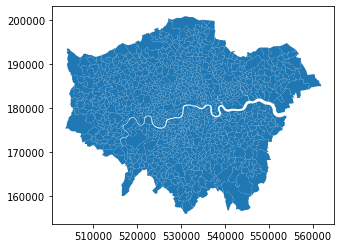

In [5]:
#Tidy up,drop useless columns
to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw']
msoas.drop(columns=to_drop, inplace=True)
msoas.plot()

### 3.3 InsideAirbnb data preparation (prevalidation, cleaning and pre-processing)
Download the listing data for 202110 from Inside Airbnb's official website (http://data.insideairbnb.com) and select the columns 'id', 'name', 'price', 'latitude', 'longitude', 'property_type', 'room_ type', 'availability_365', 'host_listings_count', and so on. Perform data pre-validation, cleaning and pre-processing

In [6]:
#Load InsideAirbnb Data
cols = ['id','name','price','latitude','longitude','property_type','room_type','availability_365','host_listings_count']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2021-10-10/data/listings.csv.gz'
df = pd.read_csv(url, usecols=cols, low_memory=False ) #red data from url
df

,id,name,host_listings_count,latitude,longitude,property_type,room_type,price,availability_365
0,13913,Holiday London DB Room Let-on going,3.0,51.568610,-0.112700,Private room in rental unit,Private room,$65.00,339
1,15400,Bright Chelsea Apartment. Chelsea!,1.0,51.487800,-0.168130,Entire rental unit,Entire home/apt,$75.00,2
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,18.0,51.521950,-0.140940,Entire rental unit,Entire home/apt,$307.00,320
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,3.0,51.479350,-0.197430,Private room in townhouse,Private room,$150.00,364
4,24328,"Battersea bedroom & studio, parking, shared ga...",0.0,51.471190,-0.162560,Entire townhouse,Entire home/apt,$200.00,273
...,...,...,...,...,...,...,...,...,...
67898,52708661,Immaculate room available,1.0,51.401175,-0.103159,Private room in residential home,Private room,$30.00,69
67899,52710377,Double studio apartment in Lancaster Gate (14,18.0,51.511012,-0.180414,Entire rental unit,Entire home/apt,$72.00,62
67900,52711482,4 Bedroom House in The Tonsleys (Wandsworth Town),1.0,51.459225,-0.183314,Entire residential home,Entire home/apt,$400.00,33
67901,52712635,Faveo Dartford Apartment,3.0,51.454401,0.207846,Entire condominium (condo),Entire home/apt,$153.00,360


Clean the data: 1. remove the unit "$" from the price column by the replace() function and change the data type to float; 2. remove the rows containing invalid values by the drop() function; 3. change the data type of the 'property_type' and 'room_type' columns to ' category'; 4. Change the data type of 'availability_365' and 'host_listings_count' to Int.

In [7]:
#data cleaning
#clean price,latitude,longitude,host_listings_count,availability_365
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
df.drop(df[((df.latitude.isna())|(df.longitude.isna()))].index, axis=0, inplace=True)
df.drop(df[((df.latitude < 40)|(df.longitude > 1))].index, axis=0, inplace=True)
df.drop(df[((df.host_listings_count.isna())|(df.availability_365.isna()))].index, axis=0, inplace=True)
print(df.shape)

#clean property_type,room_type
cats = ['property_type','room_type']
df[cats[0]].value_counts()

for c in cats:
    df[c] = df[c].astype('category')
    #clean availability_365,host_listings_count as interger
ints  = ['availability_365','host_listings_count']

for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())
        
#save cleaned data locally
df.to_csv('clean.csv')
df.info()
df.describe()

/tmp/ipykernel_3592/1051259672.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)


(67871, 9)
Converting availability_365
Converting host_listings_count
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67871 entries, 0 to 67902
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   67871 non-null  int64   
 1   name                 67847 non-null  object  
 2   host_listings_count  67871 non-null  int64   
 3   latitude             67871 non-null  float64 
 4   longitude            67871 non-null  float64 
 5   property_type        67871 non-null  category
 6   room_type            67871 non-null  category
 7   price                67871 non-null  float64 
 8   availability_365     67871 non-null  int64   
dtypes: category(2), float64(3), int64(3), object(1)
memory usage: 4.3+ MB


,id,host_listings_count,latitude,longitude,price,availability_365
count,6.787100e+04,67871.000000,67871.000000,67871.000000,67871.000000,67871.000000
mean,2.767501e+07,46.403059,51.509563,-0.128373,140.021364,100.682884
std,1.497216e+07,239.611668,0.048067,0.096584,300.679810,133.904863
min,1.391300e+04,0.000000,51.295937,-0.500270,0.000000,0.000000
25%,1.561301e+07,1.000000,51.483225,-0.188710,45.000000,0.000000
50%,2.712244e+07,1.000000,51.513750,-0.125460,80.000000,4.000000
75%,4.044933e+07,3.000000,51.539650,-0.069455,142.000000,185.000000
max,5.271719e+07,3508.000000,51.679980,0.288570,18012.000000,365.000000


### 3.4 Preliminary analysis and Visualising of Airbnb dataset

#### 3.4.1 Preliminary analysis

Observe the initial cleaning of Airbnb data df found a large number of data 'availability_365' for 0 days, which means that these listings are not available for rent throughout the year and need to be excluded. This step of analysis is done through SQL, and the processed data is stored on github and read in remotely through the pd.read_csv function.

In [8]:
url = 'https://raw.githubusercontent.com/mrborin/i2p/main/clean1.csv'
df = pd.read_csv(url, low_memory=False )

In [9]:
#Add Geometry and Reproject
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')
#drop avaliable days <0(=0day,which means not avaliable)
gdf1 = gdf.drop(gdf[(gdf.availability_365 < 1)].index, axis=0, inplace=False)
#value counts of avaliable days in future 365 days
gdf1.availability_365.value_counts()

#counts avaliable days>180
over_180 = (gdf1.availability_365 >180 ).sum()

#Associate LA (Local Authority) names to the listings using a spatial join
gdf1_la = gpd.sjoin(gdf1, boros, op='within', how='left')
print(gdf1_la.columns.values)
gdf1_la

['Unnamed: 0' 'id' 'name' 'host_listings_count' 'latitude' 'longitude'
 'property_type' 'room_type' 'price' 'availability_365' 'geometry'
 'index_right' 'NAME' 'GSS_CODE' 'HECTARES' 'NONLD_AREA' 'ONS_INNER']


,Unnamed: 0,id,name,host_listings_count,latitude,longitude,property_type,room_type,price,availability_365,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER
0,0,13913,Holiday London DB Room Let-on going,3,51.568610,-0.112700,Private room in rental unit,Private room,65,339,POINT (530901.013 187213.787),27.0,Islington,E09000019,1485.664,0.000,T
1,1,15400,Bright Chelsea Apartment. Chelsea!,1,51.487800,-0.168130,Entire rental unit,Entire home/apt,75,2,POINT (527284.576 178129.679),23.0,Kensington and Chelsea,E09000020,1238.379,25.994,T
2,2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,18,51.521950,-0.140940,Entire rental unit,Entire home/apt,307,320,POINT (529075.790 181974.865),24.0,Westminster,E09000033,2203.005,54.308,T
3,3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,3,51.479350,-0.197430,Private room in townhouse,Private room,150,364,POINT (525273.544 177139.513),22.0,Hammersmith and Fulham,E09000013,1715.409,75.648,T
4,4,24328,"Battersea bedroom & studio, parking, shared ga...",0,51.471190,-0.162560,Entire townhouse,Entire home/apt,200,273,POINT (527717.629 176292.280),21.0,Wandsworth,E09000032,3522.022,95.600,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67063,67898,52708661,Immaculate room available,1,51.401175,-0.103159,Private room in residential home,Private room,30,69,POINT (532044.631 168611.719),1.0,Croydon,E09000008,8649.441,0.000,F
67064,67899,52710377,Double studio apartment in Lancaster Gate (14,18,51.511012,-0.180414,Entire rental unit,Entire home/apt,72,62,POINT (526367.580 180689.713),24.0,Westminster,E09000033,2203.005,54.308,T
67065,67900,52711482,4 Bedroom House in The Tonsleys (Wandsworth Town),1,51.459225,-0.183314,Entire residential home,Entire home/apt,400,33,POINT (526309.287 174925.775),21.0,Wandsworth,E09000032,3522.022,95.600,T
67066,67901,52712635,Faveo Dartford Apartment,3,51.454401,0.207846,Entire condominium (condo),Entire home/apt,153,360,POINT (553498.207 175135.997),NaN,NaN,NaN,NaN,NaN,NaN


Clean the new data with Local Authority: 1. drop the unwanted columns with the drop() function; 2. find 9 rows containing na values, project them onto the map and find that they are all at the junction of administrative regions, drop them.

(34929, 13)


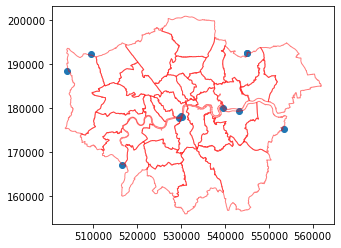

In [10]:
#drop useless columns
gdf1_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf1_la.NAME.unique()
#drop na
gdf1[gdf1_la.NAME.isna()][['id','name']]
ax = gdf1_la[gdf1_la.NAME.isna()].plot()
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5)
gdf1_la.drop(index=gdf1[gdf1_la.NAME.isna()].index, axis=1, inplace=True)
print(gdf1_la.shape)

#### 3.4.2 Visulization | Figure 1 Geographic distribution of all listings, >180 days listings and high probability misuse listings in London at Borough level

Text(0.5, 1.0, '(c) Airbnb misuse rooms map at Borough level')

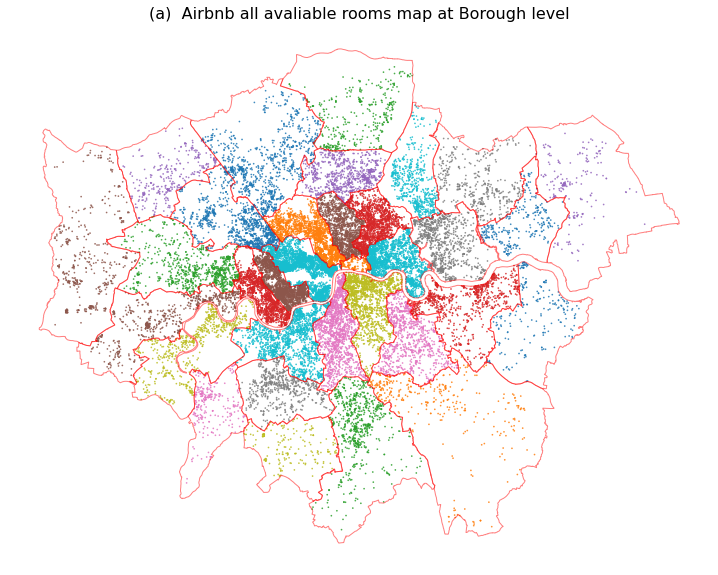

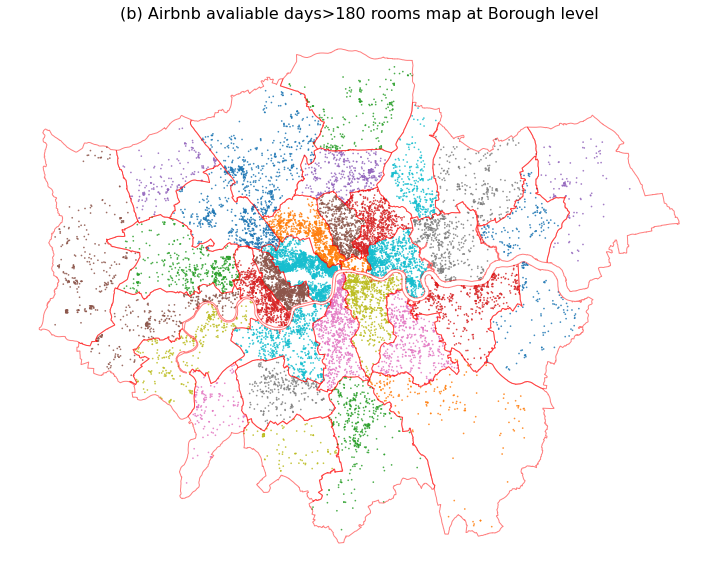

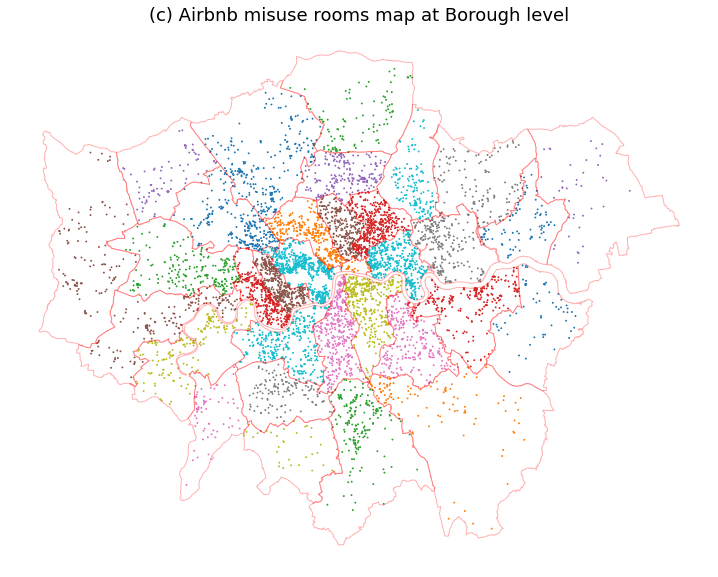

In [11]:
#map1 airbnb all avaliable room map
ax = gdf1_la.plot(column='NAME', markersize=0.5, alpha=0.8, figsize=(15,10))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);
plt.axis('off')
plt.title('(a)  Airbnb all avaliable rooms map at Borough level', fontsize=16)

#map2 airbnb avaliable days>180 rooms map
#over 180 
gdf1_la_ov180 = gdf1_la.drop(gdf1_la[(gdf1_la.availability_365 < 180)].index, axis=0, inplace=False)
ax = gdf1_la_ov180.plot(column='NAME', markersize=0.5, alpha=0.8, figsize=(15,10))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);
plt.axis('off')
plt.title('(b) Airbnb avaliable days>180 rooms map at Borough level', fontsize=16)

#map3 airbnb misuse rooms map
#MISUSE: over 180 and host_listings_count>1
gdf1_la_misuse = gdf1_la.drop(gdf1_la[((gdf1_la.availability_365 < 180) | (gdf1_la.host_listings_count > 1))].index, axis=0, inplace=False)
gdf1_la_misuse.describe()
ax = gdf1_la_misuse.plot(column='NAME', markersize=0.8, alpha=1, figsize=(15,10))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.3);
plt.axis('off')
plt.title('(c) Airbnb misuse rooms map at Borough level', fontsize=18)

#### 3.4.2 Visulization | Figure 2 Geographic distribution of all listings, >180 days listings and high probability misuse listings in London at MSOA level
Merge the previously processed datasets into MSOA geographic level data by using the join function of sjoin(). Group the data by MSOA and calculate the number of listings and the median number of listings for each MSOA.

In [12]:
#Join data in LSOA level
gdf1_la_misuse.NAME.unique()
msoadf  = gpd.sjoin(
            gdf1_la, msoas, op='within')
msoadf.head()
#Group the data by MSOA and calculate the number of listings and the median number of listings for each MSOA
msoagrdf = msoadf.groupby('MSOA11NM').size().reset_index(name='counts')
msoagrdf2 = msoadf.groupby('MSOA11NM').median().reset_index()
msoagrdf['airbnb_price'] = msoagrdf2['price']
msoagrdf
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas.set_index('MSOA11NM'), 
                rsuffix='_r')
msoa_gdf.head(3)

,counts,airbnb_price,OBJECTID,MSOA11CD,BNG_E,BNG_N,geometry,Borough,msoa11hclnm
MSOA11NM,,,,,,,,,
Barking and Dagenham 001,11,50.0,2,E02000002,548267,189685,"POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham,Marks Gate
Barking and Dagenham 002,14,45.0,3,E02000003,548259,188520,"POLYGON ((549102.438 189324.625, 548954.517 18...",Barking and Dagenham,Chadwell Heath East
Barking and Dagenham 003,1,28.0,4,E02000004,551004,186412,"POLYGON ((551550.056 187364.705, 551478.000 18...",Barking and Dagenham,Eastbrookend


Text(0.5, 1.0, '(c) Airbnb misuse rooms map at MSOA level')

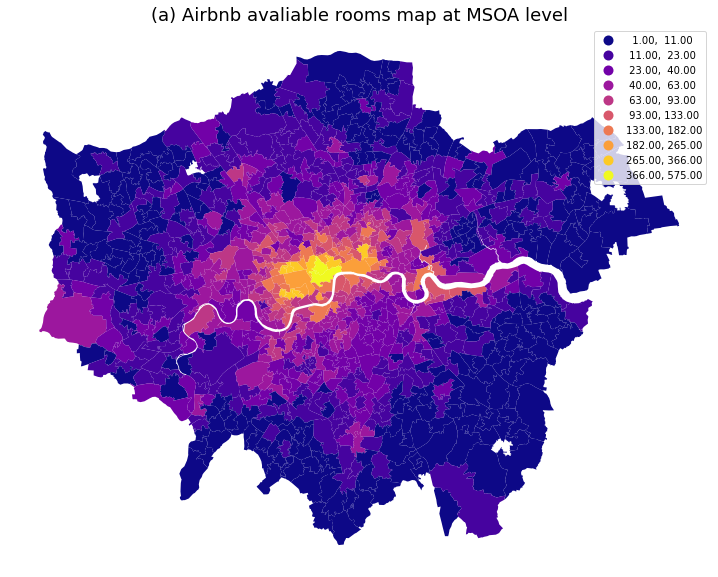

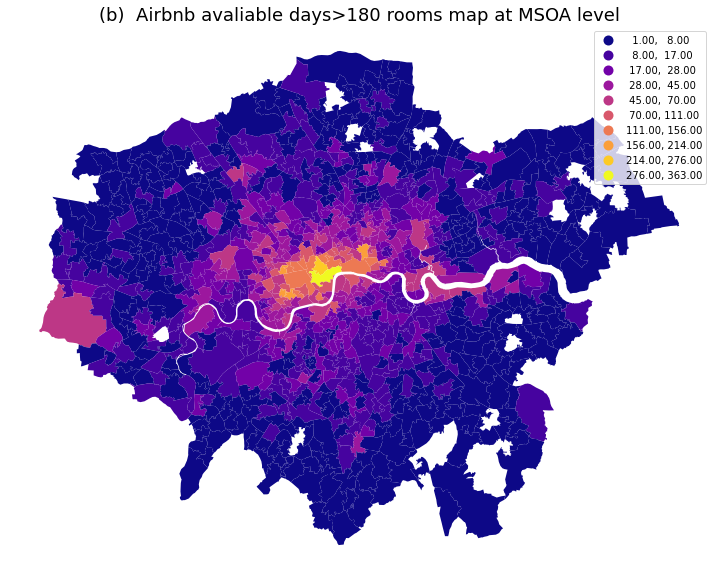

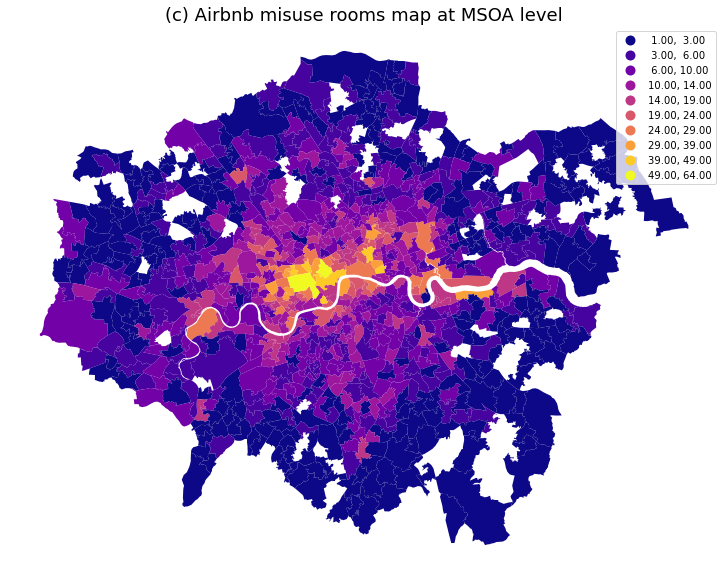

In [13]:
#map4 airbnb rooms map in msoa
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='counts', markersize=0.5, legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
msoa_all_avaliable = msoa_gdf
#ldn_msoas.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.1);
plt.axis('off')
plt.title('(a) Airbnb avaliable rooms map at MSOA level', fontsize=18)

#map5 airbnb over180 rooms map in msoa
msoadf  = gpd.sjoin(
            gdf1_la_ov180, msoas, op='within')
msoagrdf = msoadf.groupby('MSOA11NM').size().reset_index(name='counts')
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas.set_index('MSOA11NM'), 
                rsuffix='_r')
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='counts', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
plt.axis('off')
plt.title('(b)  Airbnb avaliable days>180 rooms map at MSOA level', fontsize=18)

#map6 airbnb misuse rooms map in msoa
msoadf  = gpd.sjoin(
            gdf1_la_misuse, msoas, op='within')
msoagrdf = msoadf.groupby('MSOA11NM').size().reset_index(name='counts')
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas.set_index('MSOA11NM'), 
                rsuffix='_r')
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='counts',cmap='plasma',scheme='FisherJenks',k=10, legend=True, alpha=1, figsize=(15,10))
msoa_misuse = msoa_gdf
plt.axis('off')
plt.title('(c) Airbnb misuse rooms map at MSOA level', fontsize=18)

### 3.5 Preliminary analysis and visualising of London houses prices data
Read in London house price data from a remote location and join MSOA-level maps with the sjoin() function

#### 3.5.1 Preliminary analysis

In [14]:
#load london house price data
cols = ['Local authority code','Local authority name','MSOA code','MSOA name','Year ending Dec 2013','Year ending Mar 2014','Year ending Jun 2014','Year ending Sep 2014','Year ending Dec 2014','Year ending Dec 2020','Year ending Mar 2021']
url = 'https://raw.githubusercontent.com/mrborin/i2p/main/london%20Median%20price%20paid%20by%20MSOA.csv'
df_lhp = pd.read_csv(url, usecols=cols, skiprows=5, low_memory=False,thousands=',' )
df_lhp.rename(columns={'MSOA code':'MSOA11CD'},inplace=True)
#join house price data
house_price_airbnb_all = msoa_all_avaliable.merge(df_lhp, on='MSOA11CD', how='left')
#tidy up
house_price_airbnb_all.rename(columns={'Local authority code':'Local_authority_code','Local authority name':'Local_authority_name','MSOA name':'MSOA_name','Year ending Dec 2013':'Year_ending_Dec_2013','Year ending Mar 2014':'Year_ending_Mar_2014','Year ending Jun 2014':'Year_ending_Jun_2014','Year ending Sep 2014':'Year_ending_Sep_2014','Year ending Dec 2014':'Year_ending_Dec_2014','Year ending Dec 2020':'Year_ending_Dec_2020','Year ending Mar 2021':'Year_ending_Mar_2021',},inplace=True)
house_price_airbnb_all['price_change'] = house_price_airbnb_all.Year_ending_Mar_2021 - house_price_airbnb_all.Year_ending_Mar_2014
house_price_airbnb_all['price_change_rate'] = (house_price_airbnb_all.Year_ending_Mar_2021 - house_price_airbnb_all.Year_ending_Mar_2014)/house_price_airbnb_all.Year_ending_Mar_2014

#### 3.5.2 Visulization

Text(0.5, 1.0, '(b) London house prices change map')

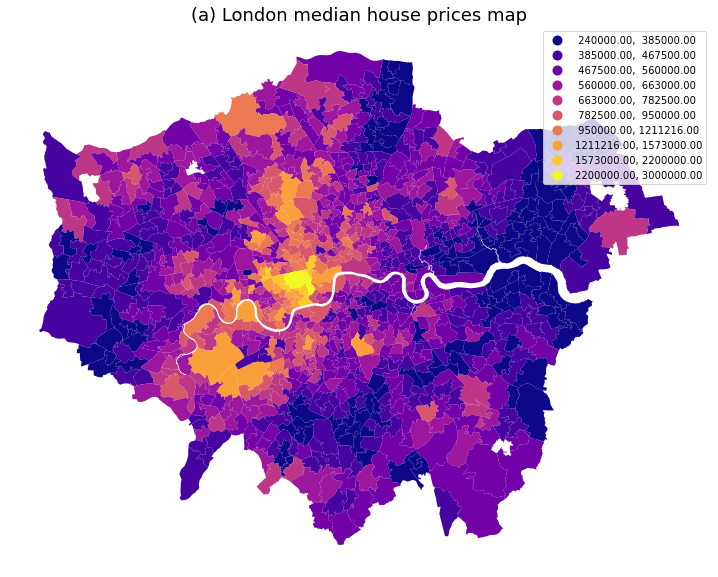

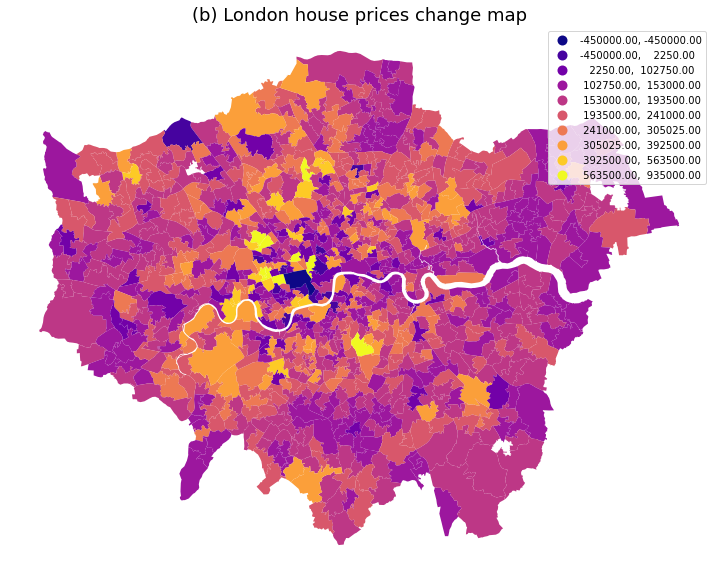

In [15]:
#map7 house prices map
house_price_airbnb_all = house_price_airbnb_all.set_geometry('geometry')
house_price_airbnb_all.plot(column='Year_ending_Mar_2021', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
plt.axis('off')
plt.title('(a) London median house prices map', fontsize=18)

#map8 house prices change map
house_price_airbnb_all = house_price_airbnb_all.set_geometry('geometry')
house_price_airbnb_all.plot(column='price_change', legend=True, alpha=1,cmap='plasma',scheme='FisherJenks',k=10, figsize=(15,10))
plt.axis('off')
plt.title('(b) London house prices change map', fontsize=18)

### 3.6 Preliminary analysis and visualising of London rental prices data
Read in London rental price data from a remote location. Since the data is at Borough level, it can only be added to the Borough level map via the sjoin() function.

#### 3.6.1 Preliminary analysis

In [16]:
#load london private rental market statistics 211215
cols = ['Local_authority_code','Area','Count_of_rents','Median']
url = 'https://raw.githubusercontent.com/mrborin/i2p/main/privaterentalmarketstatistics211215.csv'
df_retal_market = pd.read_csv(url, usecols=cols, low_memory=False,thousands=',' )

#tidy up
msoa_misuse.rename(columns={'counts':'counts_misuse'},inplace=True)
house_price_airbnb_all.rename(columns={'counts':'counts_all_avaliable'},inplace=True)
#tidy up
hp_allc_misusec = house_price_airbnb_all.merge(msoa_misuse[['counts_misuse','MSOA11CD']], on='MSOA11CD', how='left')
hp_allc_misusec.dropna(axis=0,how='any')
#drop the outlier
df_clean = hp_allc_misusec.drop(hp_allc_misusec[hp_allc_misusec.price_change == -450000.0].index)

#drop null
df_retal_market.dropna(axis=0,how='any',inplace=True)
df_retal_market.describe()

#join borough 
df_all = df_clean.merge(df_retal_market, on='Local_authority_code', how='left')
#rename
df_all.rename(columns={'Count_of_rents':'boough_Count_of_rents','Median':'boough_median_rent_price'},inplace=True)
#drop null
df_all.dropna(axis=0,how='any',inplace=True)
#add all_avaliable_rate and misuse_rate
df_all['all_avaliable_rate'] = df_all['counts_all_avaliable']/df_all['boough_Count_of_rents']
df_all['misuse_rate'] = df_all['counts_misuse']/df_all['boough_Count_of_rents']
df_all.describe()

#merge london private rental market dataset 
#at borough level
new_borough = df_clean.groupby(by=['Local_authority_code'])['counts_all_avaliable','counts_misuse'].sum()
df_all_borough = new_borough.merge(df_retal_market, on='Local_authority_code', how='left')
df_all_borough.rename(columns={'Count_of_rents':'boough_Count_of_rents','Median':'boough_median_rent_price'},inplace=True)
df_all_borough['all_avaliable_rate'] = df_all_borough['counts_all_avaliable']/df_all_borough['boough_Count_of_rents']
df_all_borough['misuse_rate'] = df_all_borough['counts_misuse']/df_all_borough['boough_Count_of_rents']
df_all_borough
#preapare log data just in case
df_all_borough['boough_Count_of_rents_log'] = df_all_borough['boough_Count_of_rents'].apply(np.log)
df_all_borough['all_avaliable_rate_log'] = df_all_borough['all_avaliable_rate'].apply(np.log)
df_all_borough['misuse_rate_log'] = df_all_borough['misuse_rate'].apply(np.log)
df_all_borough

#Geographicization airbnb and rental market dataset
gdf_df_all_borough = pd.merge(df_all_borough, boros, left_on='Local_authority_code', right_on='GSS_CODE', how='left')
gdf_df_all_borough

/tmp/ipykernel_3592/1506821944.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_borough = df_clean.groupby(by=['Local_authority_code'])['counts_all_avaliable','counts_misuse'].sum()


,Local_authority_code,counts_all_avaliable,counts_misuse,Area,boough_Count_of_rents,boough_median_rent_price,all_avaliable_rate,misuse_rate,boough_Count_of_rents_log,all_avaliable_rate_log,misuse_rate_log,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,E09000001,242,27.0,City of London,130.0,1684.0,1.861538,0.207692,4.867534,0.621403,-1.571698,City of London,E09000001,314.942,24.546,T,"MULTIPOLYGON (((531145.100 180782.100, 531143...."
1,E09000002,272,82.0,Barking and Dagenham,940.0,1200.0,0.289362,0.087234,6.845880,-1.240078,-2.439161,Barking and Dagenham,E09000002,3779.934,169.150,F,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
2,E09000003,901,233.0,Barnet,2320.0,1350.0,0.388362,0.100431,7.749322,-0.945817,-2.298284,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."
3,E09000004,213,57.0,Bexley,850.0,1200.0,0.250588,0.067059,6.745236,-1.383944,-2.702185,Bexley,E09000004,6428.649,370.619,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."
4,E09000005,1038,228.0,Brent,1720.0,1400.0,0.603488,0.132558,7.450080,-0.505029,-2.020734,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
5,E09000006,336,116.0,Bromley,2310.0,1258.0,0.145455,0.050216,7.745003,-1.927892,-2.991413,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
6,E09000007,2474,338.0,Camden,790.0,1675.0,3.131646,0.427848,6.672033,1.141559,-0.848987,Camden,E09000007,2178.932,0.000,T,"MULTIPOLYGON (((528840.200 187217.800, 528834...."
7,E09000008,701,183.0,Croydon,1510.0,1200.0,0.464238,0.121192,7.319865,-0.767357,-2.110379,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
8,E09000009,898,221.0,Ealing,2160.0,1400.0,0.415741,0.102315,7.677864,-0.877693,-2.279701,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
9,E09000010,368,100.0,Enfield,1000.0,1300.0,0.368000,0.100000,6.907755,-0.999672,-2.302585,Enfield,E09000010,8220.025,0.000,F,"MULTIPOLYGON (((531023.500 200933.600, 531039...."


#### 3.6.2 Visulization

(500648.735, 564876.965, 153596.645, 203188.055)

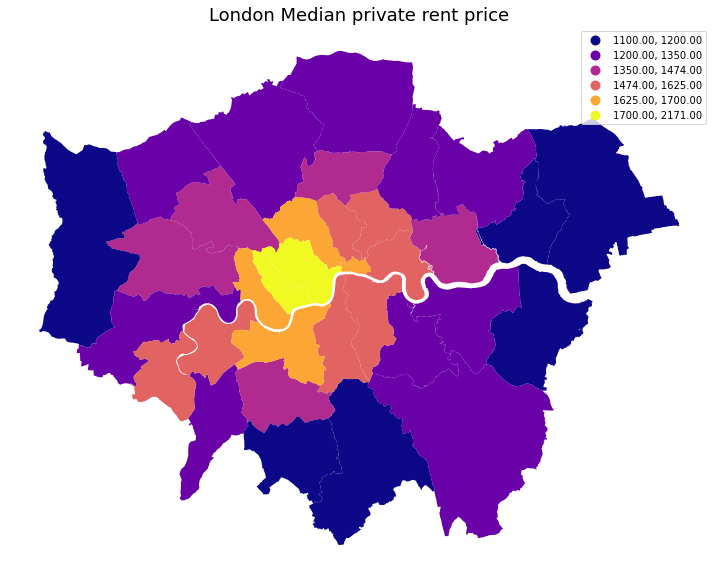

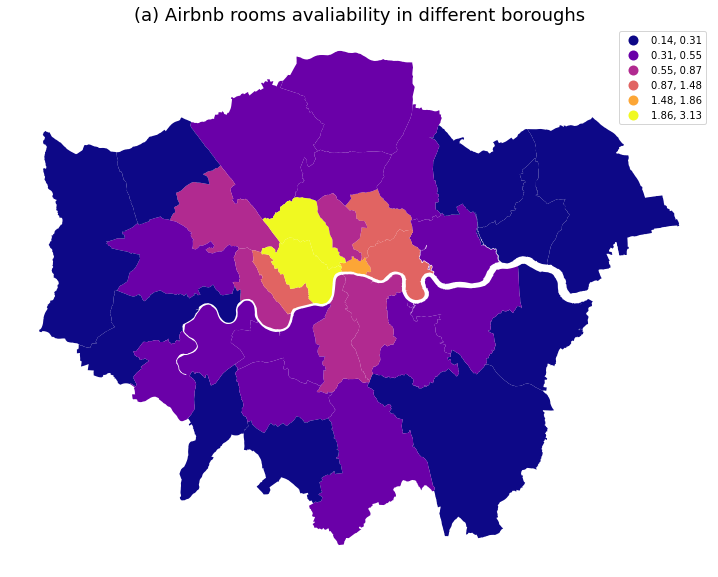

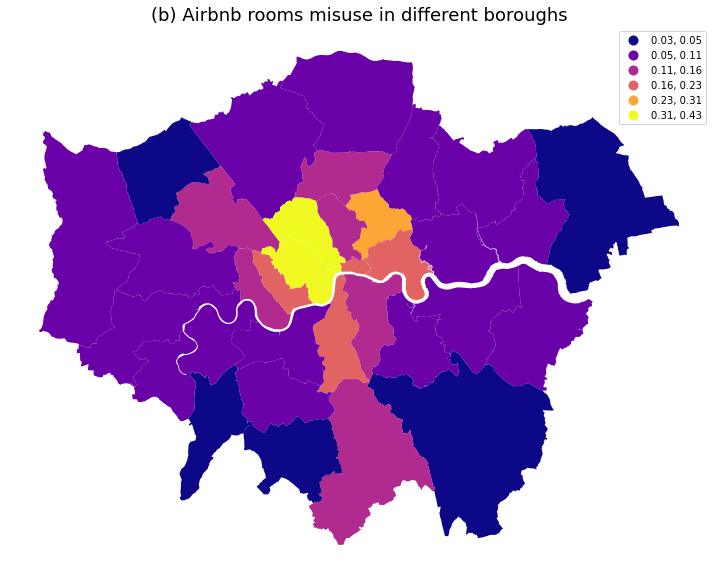

In [17]:
#map10 london rental median prices
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='boough_median_rent_price', legend=True, alpha=1,cmap='plasma',scheme='FisherJenks',k=6, figsize=(15,10))
plt.title('London Median private rent price', fontsize=18)
plt.axis('off')

#map11 london airbnb avaliability
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='all_avaliable_rate', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=6,figsize=(15,10))
plt.title('(a) Airbnb rooms avaliability in different boroughs', fontsize=18)
plt.axis('off')

#map11 london airbnb misuse
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='misuse_rate', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=6, figsize=(15,10))
plt.title('(b) Airbnb rooms misuse in different boroughs', fontsize=18)
plt.axis('off')

### 3.7 Preparation before regression analysis

#### 3.7.1 Variables list
Combining the literature review and data availability, we use median house price and median rent in London 2021 as response variables, and the number of Airbnb listings, median listings, and Misuse listings as independent variables, with data mainly focused on the MSOA level.


| Column             | Type       | Description                                                                     |
|--------------------|------------|---------------------------------------------------------------------------------|
| House median price         | Response Variable | London median house price in 2021                                     |
| airbnb_price               | Independent Variable  | Median price of Airbnb listings in different regions                                       |
| counts_all_avaliable        | Independent Variable  | Number of Airbnb listings in different regions |
| counts_misuse      | Independent Variable  | Number of Airbnb's misuse of listings in different regions                                                          |

#### 3.7.2 各个自变量在伦敦的地理分布情况
The distribution of the response variables-House median price and House medin rent-in London has been shown in 3.5.2 and 3.6.2, respectively. We have assembled the distribution of the independent variables in London below.

##### 首先将变量整合，以方便后续使用
The obtained data_all_selected data frame contains three Airbnb independent variables: Airbnb listing price, number, number of misuse and one response variable: median room price.

In [18]:
#join counts-misuse column into combined data
#rename
msoa_misuse.rename(columns={'counts':'counts_misuse'},inplace=True)
house_price_airbnb_all.rename(columns={'counts':'counts_all_avaliable'},inplace=True)
#merge together
hp_allc_misusec = house_price_airbnb_all.merge(msoa_misuse[['counts_misuse','MSOA11CD']], on='MSOA11CD', how='left')
#tidy up
hp_allc_misusec.dropna(axis=0,how='any')
#select Response Variable(house price) and Independent Variables into another dataset

data_all_selected = hp_allc_misusec[['counts_all_avaliable','airbnb_price','counts_misuse']]
data_all_selected['house_price'] = hp_allc_misusec['Year_ending_Mar_2021']
data_all_selected = data_all_selected.dropna()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


## 4.0 | Methodology

**Multiple linear regression analysis**: since we chose three independent variables and one dependent variable, choosing multiple linear regression to analyze which factors have a greater impact on London house prices is a potential approach (Barron, Kung & Proserpio, 2018; Gutiérrez et al., 2017a, 2017b; Horn & Merante, 2017; Sheppard & Udell, 2016).<br>
**Multicollinearity**:Before performing multiple linear regression analysis, multicollinearity between the three independent variables was first considered. Multicollinearity implies that there is a high degree of correlation between two or more independent variables. Using multiple independent variables that are highly correlated to a model can lead to problems such as overfitting. The independent variables may be a combination of two or more other independent variables that are identical (Stephanie, 2015). Therefore we need to ensure that there is no multicollinearity between the variables.<br>
**VIF**: We can use "stepwise regression" to check the variance inflation factor (VIF) values and **LASSO** to filter the independent variables, and then perform a multiple linear regression. Here, we use **correlation matrix** to check the multicollinearity between variables then use VIF to automatically remove the highly correlated variables.

## 5.0 | Results and Discussion

### 5.1 Splitting data into random train and test subsets
We follow the default case, train_test_split will split the data according to 75:25. We set random_state=100 to ensure repeatability. Here we input two data frames (X and Y) and will get four outputs (train_x, test_x, train_y, test_y).

In [19]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(data_all_selected.drop(['house_price'], axis = 1), data_all_selected.house_price, random_state=random_state_split)

#Double check
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(680, 3)
(680,)
(227, 3)
(227,)
True
True


### 5.2 Checking multicollinearity
In regression, multicollinearity appears when the model contains two or more highly correlated variables. It may appear even if each pair of variables involved is not co-linear. The following code is constructed to construct correlation matrix for 3 independent variables to visualize the correlation between variables.

Text(0.5, 1.0, 'Correlation Matrix')

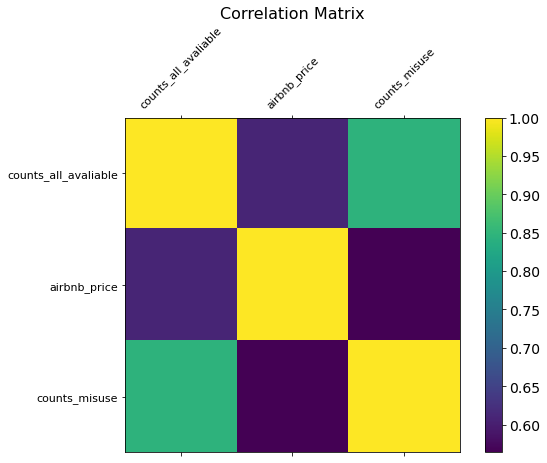

In [20]:
df = data_all_selected.drop(['house_price'], axis = 1)
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=11, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### 5.3 Linear regression with VIF
VIF uses a "stepwise regression" approach to help me automatically exclude independent variables that are highly correlated and have a small impact on the model.

In [21]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [22]:
# using VIF on the bike_rental dataset
train_x_VIF = drop_column_using_vif_(train_x, thresh=10) #Due to the small number of independent variables, here the thresh is adjusted to 10
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 3.828255775934866
The columns remaining after VIF selection are:
Index(['counts_all_avaliable', 'airbnb_price', 'counts_misuse'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 5.4 Building a linear regression model
Now we can fit a linear regression model after dealing with multicollinearity, which we will do using the sklearn package. We will use the function sklearn to run the regression model. The .fit() ensures that the variables are obtained in the correct way.

In [23]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

Now that we have created our fit, it is time to look at the structure of the model and how well it fits the data.

In [24]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  257280.50897362368
                    var         coef
0  counts_all_avaliable   536.382676
1          airbnb_price  3692.568658
2         counts_misuse  2505.677212


The code below will generate the R2 score for us.

In [25]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.447796189487756

In [26]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 09 May 2022   Prob (F-statistic):           9.40e-87
Time:                        16:28:42   Log-Likelihood:                -9218.3
No. Observations:                 680   AIC:                         1.844e+04
Df Residuals:                     676   BIC:                         1.846e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.573e+05   1.74e+04     14.775      0.000    2.23e+05    2.91e+05
counts_all_avaliable   536.3827    266.962      2.009      0.045      12.208    1060.557
airbnb_price          3692.5687    254.770     14.494      0.000    3192.332    4192.805
counts_misuse         2505.6772   1719.709      1.457      0.146    -870.936    5882.290
==============================================================================
Omnibus:                      304.256   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2344.856
Skew:                           1.828   Prob(JB):                         0.00
Kurtosis:                      11.330   Cond. No.                         243.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here you can see that the R2 value is 0.445, which is not a bad performance for explaining house prices using only Airbnb-like data. This means that **44.5%** of the hair observation in the median annual house price in London can be explained by the predictor variables used.

Next, we interpret the model. p-values for counts_all_avaliable and airbnb_price are both less than 0.05, meaning that they explain the model significantly. p-values for counts_misuse are greater than 0.05, which means that this variable is non-significant and may require some changes to misuse to improve the model's explanation The p-value of counts_misuse is greater than 0.05, and this variable is non-significant. Regarding counts_all_avaliable, each increase in Airbnb listings within the MSOA leads to an average increase of £536 in house prices. Regarding the price of Airbnb listings, each £1/night increase leads to a £3,693 increase in London house prices. Regarding Airbnb's Misuse situation, each additional Misuse listing results in an average price increase of £2,506.

In [27]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.3648992096479091

The R2 of the test set is about 0.365, which is not much different from the training set.

### 5.5 Linear regression with Lasso
To improve the prediction accuracy and the interpretability of the regression model, we can use the
Lasso model to select variables and perform regularized regression methods. We run the
the following code to fit the Lasso model.

In [28]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)
lasso_model.score(X=train_x, y=train_y)

0.4477961769277218

The R2 here does not differ much from the previous results.
We can check out the coefficients using the following code.

In [29]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                    var         coef
0  counts_all_avaliable   536.724900
1          airbnb_price  3692.289696
2         counts_misuse  2501.187819


we will manually set alphas to list_alphas.

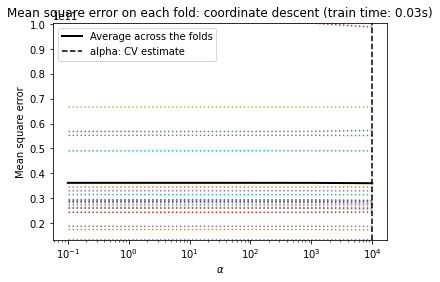

In [31]:
from sklearn.linear_model import LassoCV
import time
from itertools import cycle
from sklearn.linear_model import lasso_path

list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]
start_time = time.time()
lasso_cv = LassoCV(cv=20, alphas=list_alphas).fit(train_x, train_y)
fit_time = time.time() - start_time
import matplotlib.pyplot as plt

ymin, ymax = np.min(lasso_cv.mse_path_), np.max(lasso_cv.mse_path_)
# lasso = model[-1]
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle=":")
plt.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso_cv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

Print the alphas_ values that have been compared.

In [32]:
print(lasso_cv.alphas_)

[1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 5.e-01 1.e-01]


The optimal alpha value is as follows.

In [33]:
print(lasso_cv.alpha_)

10000.0


Rerun the lasso model using the optimal alpha value:

In [34]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=train_x, y=train_y)
print(lasso_model.score(train_x, train_y))

0.0


The result is not very satisfactory, we then try to use RANDOM FOREST to analyze.

### 5.6Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(random_state=0)
reg_random_forest.fit(train_x, train_y)

RandomForestRegressor(random_state=0)

We can check the R2 score of this model.

In [36]:
print("R2 on the training data:")
print(reg_random_forest.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_random_forest.score(X=test_x, y=test_y))

R2 on the training data:
0.9192332923096682
R2 on the testing data:
0.31623598327766456


Here, the R2 difference between the test set and the training set is too large for the possible overfitting problem.

In [37]:
! pip install rfpimp
import rfpimp

                      Importance
Feature                         
airbnb_price            0.545432
counts_all_avaliable    0.108598
counts_misuse          -0.032106


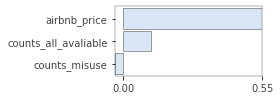

In [38]:
imp = rfpimp.importances(reg_random_forest, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

Here we can see that Airbnb price is far more important than the other two independent variables.

## 6.0 | Conclusion
In conclusion, this paper examines and visualizes how Airbnb affects London house prices, through a Goggin regression analysis, with the aim when answering the research question:

    RQ1 | What is the current Misuse situation for listings on London Airbnb and how is Misuse affecting the London housing market?
    RQ2 | How does the number of London Airbnb listings, prices, and Misuse situation affect the London housing market?

**RQ1**:Looking at the map, the current misuse situation in London Airbnb is relatively serious, despite government legislation restricting it. misuse can lead to an increase in London house prices, each additional Misuse listing results in an average price increase of £2,506.<br>
**RQ2**:The number of London Airbnb listings and the price of the listings are positively correlated with London house prices.Regarding counts_all_avaliable, each increase in Airbnb listings within the MSOA leads to an average increase of £536 in house prices. Regarding the price of Airbnb listings, each £1/night increase leads to a £3,693 increase in London house prices.

This means that firstly, Airbnb listings will drive up London house prices, adding to the pressure on Londoners, especially newcomers, to purchase homes; and secondly, the lack of policy enforcement since the government legislation in 2015 to restrict Airbnb misuse, there are still more misuse situations, further positively affecting London house prices. At the level of London legislation and enforcement, there is a lot of room for improvement.

## Bibliography

Anon (2016) London house prices fall at fastest rate in 10 years | House prices | The 
Guardian. 2016. Edwards, M. https://www.theguardian.com/money/2019/jul/17/london￾house-prices-fall-at-fastest-rate-in-10-years-ons [Accessed: 11 January 2022].
Barron, K., Kung, E. & Proserpio, D. (2018) The Sharing Economy and Housing Affordability. 
5–5. doi:10.1145/3219166.3219180.

Davidson, M. & Wyly, E. (2012) Class-ifying London. 
http://dx.doi.org/10.1080/13604813.2012.696888. 16 (4), 395–421. 
doi:10.1080/13604813.2012.696888.

Gutiérrez, J., García-Palomares, J.C., Romanillos, G. & Salas-Olmedo, M.H. (2017a) The 
eruption of Airbnb in tourist cities: Comparing spatial patterns of hotels and peer-to-peer 
accommodation in Barcelona. Tourism Management. 62, 278–291. 
doi:10.1016/J.TOURMAN.2017.05.003.

Gutiérrez, J., García-Palomares, J.C., Romanillos, G. & Salas-Olmedo, M.H. (2017b) The 
eruption of Airbnb in tourist cities: Comparing spatial patterns of hotels and peer-to-peer 
accommodation in Barcelona. Tourism Management. 62, 278–291. 
doi:10.1016/J.TOURMAN.2017.05.003.

Hamnett, C. (2003) Unequal City: London in the global arena. Unequal City: London in the 
Global Arena. 1–276. doi:10.4324/9780203580240/UNEQUAL-CITY-CHRIS-HAMNETT.

HM Government United Kingdom (2015) Explanatory Notes to Deregulation Act 2015. 
https://www.legislation.gov.uk/ukpga/2015/20/notes/division/5/46.

Horn, K. & Merante, M. (2017) Is home sharing driving up rents? Evidence from Airbnb in 
Boston. Journal of Housing Economics. 38, 14–24. doi:10.1016/J.JHE.2017.08.002.
McAfee, A. & Brynjolfsson, E. (2017) Machine, platform, crowd : harnessing our digital future. 
402. 
https://books.google.com/books/about/Machine_Platform_Crowd_Harnessing_Our_Di.html?
hl=zh-CN&id=zh1DDQAAQBAJ.

Parker, G.G., van Alstyne, M.W. & Choudary, S.P. (2016) Platform revolution: How networked 
markets are transforming the economy and how to make them work for you. Platform 
Revolution: How Networked Markets Are Transforming the Economy - and How to Make 
Them Work for You.

Quattrone, G., Proserpio, D., Quercia, D., Capra, L. & Musolesi, M. (2016) Who benefits from 
the “sharing” economy of airbnb? 25th International World Wide Web Conference, WWW 
2016. 1385–1393. doi:10.1145/2872427.2874815.

Rev., D.L.-Harv.L.& P. & 2016, undefined (n.d.) How Airbnb short-term rentals exacerbate Los 
Angeles’s affordable housing crisis: Analysis and policy recommendations. HeinOnline. 
https://heinonline.org/hol-cgi￾bin/get_pdf.cgi?handle=hein.journals/harlpolrv10&section=13&casa_token=kREU4ED6_zUA
AAAA:nSTuuk4G￾ueauVsj666bFqRzalLdOPjPA3AKs4Q4xGABmcdxRHiAMxlNyuzukJSf2NJOj5RkxNs.

Rowland Manthorpe (2018) Airbnb is booming in London | WIRED UK. 2018. 
https://www.wired.co.uk/article/airbnb-growth-london-housing-data-insideairbnb 
[Accessed: 11 January 2022].

Shabrina, Z., Arcaute, E. & Batty, M. (2021) Airbnb and its potential impact on the London 
housing market: https://doi.org/10.1177/0042098020970865. 59 (1), 197–221. 
doi:10.1177/0042098020970865.

Sheppard, S. & Udell, A. (2016) Do Airbnb Properties Affect House Prices. undefined.

Snelling, C. & Colebrook, C. (2016) Homesharing & London’s housing market. ippr.org. 
https://www.ippr.org/files/publications/pdf/homesharing-and-london-housing-marketdec16.pdf.

Stone, B. (2017) The upstarts: How Uber, Airbnb, and the killer companies of the new Silicon 
Valley are changing the world. Brown and Company.

Watt, P. & Minton, A. (2016) London’s housing crisis and its activisms. 
http://dx.doi.org/10.1080/13604813.2016.1151707. 20 (2), 204–221. 
doi:10.1080/13604813.2016.1151707.

Zervas, G. (2017) The rise of the sharing economy: Estimating the impact of Airbnb on the 
hotel industry. journals.sagepub.com. 54 (5), 687–705. doi:10.1509/jmr.15.0204.